In [16]:
# https://www.acmicpc.net/problem/2747

def fibo(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        a, b=0, 1
        for _ in range(n-1):
            c = a+b
            a, b = b, c
        return c
    
fibo(int(input()))

# 이게 왜틀려..? print를 안찍었네 ㅎㅎ
# 1. 일반 반복문
# 2. 동적계획법 - 메모이제이션
# 3. 재귀함수

10


55

In [15]:
# 선생님 - Wow~

n = int(input())

a, b = 0, 1

while n>0:
    a, b = b, a+b
    n -=1

print(a)

10
55


In [80]:
# https://www.acmicpc.net/problem/1074

# 아이디어는 다음과 같다.

# 1. Z를 꼭지점을 순서대로 1사분면, 2사분면, 3사분면, 4사분면이라 칭한다.

# 2. 점점 커지는 Z의 단계를 scale이라 칭한다. 예를들어 4개로 이루어진 가장 작은 Z의 경우 scale=1이고, 16개로 이루어진 Z는 scale=2이다.

# 3. 이때, (r, c)를 가장 큰 scale에서 (r, c)가 위치한 곳 까지 scale을 좁혀나간다고 생각하자.
#    가장 큰 scale과 각 scale별로 몇 사분면에 위치하는지 알 수 있다면 (r, c)의 순서를 구할 수 있다.

#    예를들어, (7, 6)의 경우 최대 scale은 3이고 scale별 사분면 위치는 [0,2,3,4] 이다. (0은 배열 다루기 편하게 하기위해 넣은 dummy)
#    scale=3에선 4사분면에 위치한다. 1~3분면을 떼고 scale을 2로 낮춘다.
#    scale=2에선 3사분면에 위치한다. 나머지 1, 2, 4 사분면을 떼고 scale을 1로 낮춘다.
#    scale=1에선 2사분면에 위치한다.

# 4. scale과 scale별 사분면의 위치를 알았다면
#    k : 최대 스케일~1 까지 순환하는 변수 , arr: 사분면의 위치를 담은 배열
#    result += (arr[k]-1)*(4**(k-1))   (k: 1~scale)
#    답은 위와 같다. 각 scale별로 n 사분면에 있다면, n-1 사분면 까지의 갯수를 모두 더하는걸 반복한다.

n, r, c = map(int, input().split())
r+=1
c+=1

scale = 0
while max(r, c) > 2**scale:
    scale+=1
    
arr = [0]*(scale + 1)    

for k in range(scale, 0, -1):
    divider = 2**(k-1)
    if r>divider and c>divider:
        arr[k]=4
        r -= divider
        c -= divider
    elif r>divider:
        arr[k]=3
        r-=divider
    elif c>divider:
        arr[k]=2
        c-=divider
    else:
        arr[k]=1
        
result = 0
for k in range(scale, 0, -1):
    result += (arr[k]-1)*(4**(k-1))
    
print(result)

# 이건 프로그래밍스럽게 풀었다.
# 처음 푼 방법(내가 풀고도 이게 왜맞지? 했던 방법)은 사실 지금 방법을 더 수학적으로 축약한 방법이었다.
# 처음 푼 방법은 r, c를 이진수로 나타내고
# (0, 0) => 1, (0, 1) => 2, (1, 0) => 3, (1, 1) => 4 로 변환
# 이런식으로 변환했는데 사실 이 변환에서 이진수들이 divider를 넘느냐 안넘느냐 역할이었음.

3 7 7
63


In [91]:
# 선생님

def solve(n, x, y):
    global result
    
    if n==2:
        if x==X and y==Y:
            print(result)
            return
        result+=1
        if x==X and y+1==Y:
            print(result)
            return
        result+=1
        if x+1==X and y==Y:
            print(result)
            return
        result+=1
        if x+1==X and y+1==Y:
            print(result)
            return
        result+=1
        return
    
    # 재귀 날리는 순서 중요함.
    # 재귀를 Z순서로 날려야 답을 구할 수 있음.
    solve(n/2, x, y)
    solve(n/2, x, y+n/2)
    solve(n/2, x+n/2, y)
    solve(n/2, x+n/2, y+n/2)

result=0
N, X, Y = map(int, input().split())
solve(2**N, 0, 0)

3 7 5
59


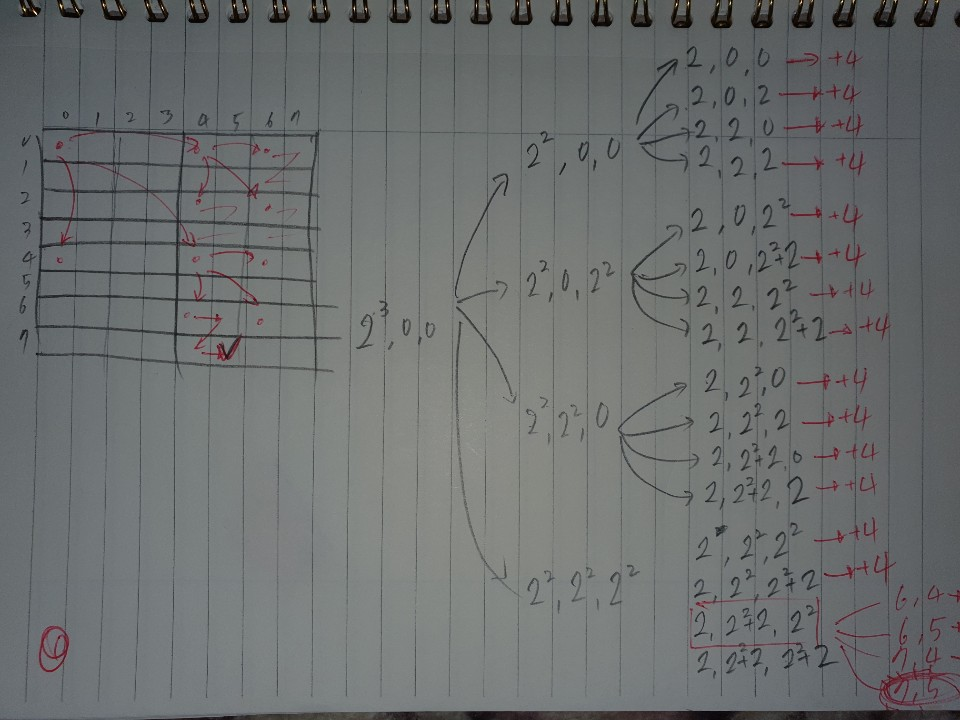


위와 같이 접근하기 때문에 재귀 보내는 순서도 중요함.

In [112]:
# https://www.acmicpc.net/problem/7490

def make_zero(line, num):
    if num==n:
        arr.append(line+str(num))
    else:
        make_zero(line+str(num)+" ", num+1)
        make_zero(line+str(num)+"+", num+1)
        make_zero(line+str(num)+"-", num+1)
        
test_case = int(input())

for _ in range(test_case):
    n = int(input())
    arr = []
    make_zero("", 1)
    for equation in arr:
        if eval(equation.replace(' ', ''))==0:
            print(equation)
    print()

7
3
1+2-3

4
1-2-3+4

5
1 2-3-4-5

6
1 2+3-4-5-6

7
1+2-3+4-5-6+7
1+2-3-4+5+6-7
1-2 3+4+5+6+7
1-2 3-4 5+6 7
1-2+3+4-5+6-7
1-2-3-4-5+6+7

8
1 2-3 4-5 6+7 8
1+2 3-4 5+6+7+8
1+2+3+4-5-6-7+8
1+2+3-4+5-6+7-8
1+2-3+4+5+6-7-8
1+2-3-4-5-6+7+8
1-2 3-4+5+6+7+8
1-2+3-4-5+6-7+8
1-2-3+4+5-6-7+8
1-2-3+4-5+6+7-8

9
1 2+3 4-5 6-7+8+9
1 2+3+4-5-6-7+8-9
1 2+3-4 5+6+7+8+9
1 2+3-4+5-6+7-8-9
1 2-3+4+5 6-7 8+9
1 2-3+4+5+6-7-8-9
1 2-3-4-5+6-7-8+9
1 2-3-4-5-6+7+8-9
1+2-3 4-5 6+7 8+9
1-2 3-4-5 6-7+8 9
1-2-3 4+5+6+7+8+9



In [113]:
# 선생님
# 이건 내 풀이가 더 나은데?

import copy

def recursive(array, n):
    if len(array) == n:
        operators_list.append(copy.deepcopy(array))
        return
    
    array.append(' ')
    recursive(array, n)
    array.pop()
    
    array.append('+')
    recursive(array, n)
    array.pop()
    
    array.append('-')
    recursive(array, n)
    array.pop()

    
test_case = int(input())

for _ in range(test_case):
    operators_list = []
    n = int(input())
    recursive([], n - 1)
    
    integers = [i for i in range(1, n + 1)]
    
    for operators in operators_list:
        string = ""
        for i in range(n - 1):
            string += str(integers[i]) + operators[i]
        string += str(integers[-1])
        if eval(string.replace(" ", "")) == 0:
            print(string)
    print()

1
7
1+2-3+4-5-6+7
1+2-3-4+5+6-7
1-2 3+4+5+6+7
1-2 3-4 5+6 7
1-2+3+4-5+6-7
1-2-3-4-5+6+7

